In [1]:
import cv2 
import os 
import glob
import numpy as np

import matplotlib.pyplot as plt 

from tqdm import tqdm 
from module.utils import imread
from module.disp_measure import convert_by_img

In [2]:
img_list = glob.glob(os.path.join('imgs', 'P34_9', '*.jpg'))

In [4]:
## check the circle detection accuracy 

param1 = 100
param2 = 15
min_rad = 30
max_rad = 40
img = imread(img_list[0]) 
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret3, th3 = cv2.threshold(grey_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

circles = cv2.HoughCircles(th3, 
                               cv2.HOUGH_GRADIENT,
                               1, 
                               20, 
                               param1=param1,
                               param2=param2,
                               minRadius=min_rad,
                               maxRadius=max_rad)

# Draw circles that are detected. 
if circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    circles = np.uint16(np.around(circles)) 
  
    for pt in circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
  
        # Draw the circumference of the circle. 
        cv2.circle(img, (a, b), r, (0, 255, 0), 2) 
  
        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
        cv2.imshow("Detected Circle", img) 
        cv2.waitKey(0) 
else:
        cv2.imshow('Circle is not detected', img)
        cv2.waitKey(0) 

In [3]:
result = [] 
src_img = imread(img_list[0])

for img_path in tqdm(img_list): 
    dest_img = imread(img_path)
    result.append(convert_by_img(dest_img,
                                 src_img,
                                 min_rad = 70,
                                 max_rad = 90,
                                 param1 = 80,
                                 param2 = 50))

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.00it/s]


In [4]:
collect_rslt = []
for rslt in result : 
    collect_rslt.append(rslt[0])

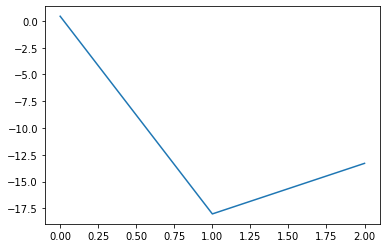

In [5]:
plt.plot(np.array(collect_rslt))

In [9]:
np.savetxt("P34_7.csv", np.array(collect_rslt), delimiter=",")